In [1]:
!pip install pandas-profiling

In [2]:
!pip install sweetviz

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import pandas_profiling
import sweetviz as sv # for sweet viz eda
from scipy.stats import zscore # zscore to standrize data
from scipy import linalg as LA

# Problem 1A

### Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

### [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

### 1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.
### 2. Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
### 3. Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
### 4. If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

In [4]:
Df=pd.read_csv('SalaryData.csv')

In [5]:
Df.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [6]:
Df.describe()

Salary
count      40.000000
mean   162186.875000
std     64860.407506
min     50103.000000
25%     99897.500000
50%    169100.000000
75%    214440.750000
max    260151.000000

In [7]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


### 1A.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

### For Variable Education

#### H0 : Salary depend on Education
#### H1 : Salary doesnot depend on Education
#### Confidence interval =0.05

### For Variable Occupation
#### H0 : Salary depend on Occupation
#### H1: Salary doesnot depend on Occupation
#### Confidence interval =0.05


In [8]:
Df.Education = pd.Categorical(Df.Education)
Df.Occupation = pd.Categorical(Df.Occupation)

In [9]:
Df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [10]:
Df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

### 1A.2 Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [11]:
formula = 'Salary ~ C(Education)'
model = ols(formula, Df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [12]:
alpha = 0.05
print (' alpha = ' , alpha)

if ((aov_table.iloc[0]['PR(>F)']) > alpha):
     print(" p > alpha, so  Null hypothesis is accepted.Salary depend on Education")
else:
    print( " p < alpha, so  Null hypothesis is rejected.Salary does not depend on Education"  )

 alpha =  0.05
 p < alpha, so  Null hypothesis is rejected.Salary does not depend on Education


### 1A.3 Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [13]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, Df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


In [14]:
alpha = 0.05
print (' alpha = ' , alpha)

if ((aov_table.iloc[0]['PR(>F)']) > alpha):
     print(" p > alpha, so Null hypothesis is accepted. Salary depend on Occupation")
else:
    print( " p < alpha, so  Null hypothesis is rejected. Salary doesnot depend on Occupation") 
    

 alpha =  0.05
 p > alpha, so Null hypothesis is accepted. Salary depend on Occupation


## Problem 1B:
### 1B.1 What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

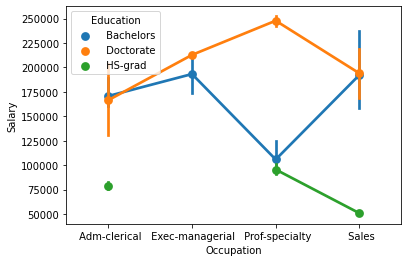

In [15]:
sns.pointplot(x='Occupation', y='Salary', data=Df, hue='Education',join=True)

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

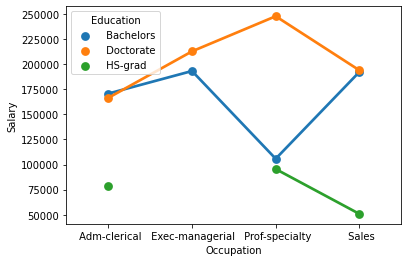

In [16]:
sns.pointplot(x='Occupation', y='Salary', data=Df, hue='Education',ci=None)

#### As seen from the above interaction plots, there seem to be a moderate interaction between two categorical variables.
#### ADM-Clerical and Sales proffessional with Bachelors and Doctorate degree earn almost similar salary package.

### 1B.2 Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

### H0 = Salary depend on both categories Education and Ocupation
### H1 = Salary does not depend on atleast one of the categories of  Education and Ocupation
### Confidence level = 0.05

In [17]:
formula = 'Salary ~ C(Education) + C(Occupation)+C(Education):C(Occupation)'
model = ols(formula, Df).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


In [18]:
alpha = 0.05
print ('alpha = ' , alpha)
print ( " is PValue is less than Alpha ")
aov_table['PR(>F)'] < alpha

alpha =  0.05
 is PValue is less than Alpha 


C(Education)                   True
C(Occupation)                 False
C(Education):C(Occupation)     True
Residual                      False
Name: PR(>F), dtype: bool

#### Considering both education and occupation, education is the signifigant variable as the P Value is <0.05,
#### whereas occupation is not the significant variable as the P Value is >0.05




### 1B.3 Explain the business implications of performing ANOVA for this particular case study.

#### We conclude that by doing ANOVA for the given dataset, Salary is depend on Occupation and there is a moderate interaction between Education and Occupation variables.

# Problem 2

### The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

### 2.1. Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?
### 2.2. Is scaling necessary for PCA in this case? Give justification and perform scaling.
### 2.3. Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].
### 2.4. Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]
### 2.5. Extract the eigenvalues and eigenvectors.[print both]
### 2.6. Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features
### 2.7. Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only).
### 2.8. Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?
### 2.9. Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [19]:
data_df = pd.read_csv("Education+-+Post+12th+Standard.csv")
data_df.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [20]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [21]:
data_df.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [22]:
data_df.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [23]:
data_df.isna().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

### 2.1. Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

In [24]:
# Check for duplicate data
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data_df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Names, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

In [25]:
# Check for correlation of variable
data_df.corr(method='pearson')

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [26]:
print(" Univariate , Multivariate Analysis using sweetviz")

report1 = sv.analyze(data_df)
report1.show_html('Education_data_EDA.html')

 Univariate , Multivariate Analysis using sweetviz



Report Education_data_EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### enroll has high correlation with accept , apps ,f.undergrad. 

In [27]:
sns.pairplot(data_df,diag_kind='kde')

### Distribution of variables shows most of the values are concentrated on lower side.
### Relationship between variables shows come correlation.

### 2.2. Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [28]:
# Drop Names
data_new = data_df.drop(['Names'], axis =1)

data_new.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

In [29]:
data_new.boxplot(figsize=(20,3))

<AxesSubplot:>

In [30]:
print (" To standardize the process we will use zscaler ")

data_scale=data_new.apply(zscore)
data_scale.head()

 To standardize the process we will use zscaler 


Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [31]:
data_scale.boxplot(figsize=(20,3))

<AxesSubplot:>

In [32]:
data_scale.describe().T

count          mean       std       min       25%       50%  \
Apps         777.0  6.355797e-17  1.000644 -0.755134 -0.575441 -0.373254   
Accept       777.0  6.774575e-17  1.000644 -0.794764 -0.577581 -0.371011   
Enroll       777.0 -5.249269e-17  1.000644 -0.802273 -0.579351 -0.372584   
Top10perc    777.0 -2.753232e-17  1.000644 -1.506526 -0.712380 -0.258583   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -1.661405e-16  1.000644 -0.734617 -0.558643 -0.411138   
P.Undergrad  777.0 -3.029180e-17  1.000644 -0.561502 -0.499719 -0.330144   
Outstate     777.0  6.515595e-17  1.000644 -2.014878 -0.776203 -0.112095   
Room.Board   777.0  3.570717e-16  1.000644 -2.351778 -0.693917 -0.143730   
Books        777.0 -2.192583e-16  1.000644 -2.747779 -0.481099 -0.299280   
Personal     777.0  4.765243e-17  1.000644 -1.611860 -0.725120 -0.207855   
PhD          777.0  5.954768e-17  1.000644 -3.962596 -0.653295  0.143389   
Terminal     777.0 -4.481615e-16  1.000644 -3.785982 -0.591502  0.156142   
S.F.Ratio    777.0 -2.057556e-17  1.000644 -2.929799 -0.654660 -0.123794   
perc.alumni  777.0 -6.022638e-17  1.000644 -1.836580 -0.786824 -0.140820   
Expend       777.0  1.213101e-16  1.000644 -1.240641 -0.557483 -0.245893   
Grad.Rate    777.0  3.886495e-16  1.000644 -3.230876 -0.726019 -0.026990   

                  75%        max  
Apps         0.160912  11.658671  
Accept       0.165417   9.924816  
Enroll       0.131413   6.043678  
Top10perc    0.422113   3.882319  
Top25perc    0.667104   2.233391  
F.Undergrad  0.062941   5.764674  
P.Undergrad  0.073418  13.789921  
Outstate     0.617927   2.800531  
Room.Board   0.631824   3.436593  
Books        0.306784  10.852297  
Personal     0.531095   8.068387  
PhD          0.756222   1.859323  
Terminal     0.835818   1.379560  
S.F.Ratio    0.609307   6.499390  
perc.alumni  0.666685   3.331452  
Expend       0.224174   8.924721  
Grad.Rate    0.730293   3.060392

### Inference we used is ZSCALER to standardize the data into single scale. Now all variables are in in between the scale of -2.5 to 12.5 

### 2.3. Comment on the comparison between the covariance and the correlation matrices from this data.

In [33]:
# Check for correlation of variable
data_scale.corr(method='pearson')

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [34]:
data_scale.cov()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.001289  0.944666  0.847913   0.339270   0.352093     0.815540   
Accept       0.944666  1.001289  0.912811   0.192695   0.247795     0.875350   
Enroll       0.847913  0.912811  1.001289   0.181527   0.227037     0.965883   
Top10perc    0.339270  0.192695  0.181527   1.001289   0.893144     0.141471   
Top25perc    0.352093  0.247795  0.227037   0.893144   1.001289     0.199702   
F.Undergrad  0.815540  0.875350  0.965883   0.141471   0.199702     1.001289   
P.Undergrad  0.398777  0.441839  0.513730  -0.105492  -0.053646     0.571247   
Outstate     0.050224 -0.025788 -0.155678   0.563055   0.490024    -0.216020   
Room.Board   0.165152  0.091016 -0.040284   0.371959   0.331917    -0.068979   
Books        0.132729  0.113672  0.112856   0.119012   0.115676     0.115699   
Personal     0.178961  0.201248  0.281291  -0.093437  -0.080914     0.317608   
PhD          0.391201  0.356216  0.331896   0.532513   0.546566     0.318747   
Terminal     0.369968  0.338018  0.308671   0.491768   0.525425     0.300406   
S.F.Ratio    0.095756  0.176456  0.237577  -0.385370  -0.295009     0.280064   
perc.alumni -0.090342 -0.160196 -0.181027   0.456072   0.418403    -0.229758   
Expend       0.259927  0.124878  0.064252   0.661765   0.528127     0.018676   
Grad.Rate    0.146944  0.067399 -0.022370   0.495627   0.477896    -0.078875   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398777  0.050224    0.165152  0.132729  0.178961  0.391201   
Accept          0.441839 -0.025788    0.091016  0.113672  0.201248  0.356216   
Enroll          0.513730 -0.155678   -0.040284  0.112856  0.281291  0.331896   
Top10perc      -0.105492  0.563055    0.371959  0.119012 -0.093437  0.532513   
Top25perc      -0.053646  0.490024    0.331917  0.115676 -0.080914  0.546566   
F.Undergrad     0.571247 -0.216020   -0.068979  0.115699  0.317608  0.318747   
P.Undergrad     1.001289 -0.253839   -0.061405  0.081304  0.320294  0.149306   
Outstate       -0.253839  1.001289    0.655100  0.038905 -0.299472  0.383476   
Room.Board     -0.061405  0.655100    1.001289  0.128128 -0.199685  0.329627   
Books           0.081304  0.038905    0.128128  1.001289  0.179526  0.026940   
Personal        0.320294 -0.299472   -0.199685  0.179526  1.001289 -0.010950   
PhD             0.149306  0.383476    0.329627  0.026940 -0.010950  1.001289   
Terminal        0.142086  0.408509    0.375022  0.100084 -0.030653  0.850682   
S.F.Ratio       0.232830 -0.555536   -0.363095 -0.031970  0.136521 -0.130698   
perc.alumni    -0.281154  0.566992    0.272714 -0.040260 -0.286337  0.249330   
Expend         -0.083676  0.673646    0.502386  0.112554 -0.098018  0.433319   
Grad.Rate      -0.257332  0.572026    0.425489  0.001062 -0.269691  0.305431   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369968   0.095756    -0.090342  0.259927   0.146944  
Accept       0.338018   0.176456    -0.160196  0.124878   0.067399  
Enroll       0.308671   0.237577    -0.181027  0.064252  -0.022370  
Top10perc    0.491768  -0.385370     0.456072  0.661765   0.495627  
Top25perc    0.525425  -0.295009     0.418403  0.528127   0.477896  
F.Undergrad  0.300406   0.280064    -0.229758  0.018676  -0.078875  
P.Undergrad  0.142086   0.232830    -0.281154 -0.083676  -0.257332  
Outstate     0.408509  -0.555536     0.566992  0.673646   0.572026  
Room.Board   0.375022  -0.363095     0.272714  0.502386   0.425489  
Books        0.100084  -0.031970    -0.040260  0.112554   0.001062  
Personal    -0.030653   0.136521    -0.286337 -0.098018  -0.269691  
PhD          0.850682  -0.130698     0.249330  0.433319   0.305431  
Terminal     1.001289  -0.160310     0.267475  0.439365   0.289900  
S.F.Ratio   -0.160310   1.001289    -0.403448 -0.584584  -0.307106  
perc.alumni  0.267475  -0.403448     1.001289  0.418250   0.491530  
Expend       0.439365  -0.58458

#### Covariance indicates the direction of the linear relationship between variables. Correlation  measures both the strength and direction of the linear relationship between two variables. Correlation is a function of the covariance. What sets them apart is the fact that correlation values are standardized whereas covariance values are not.

### 2.4. Check the dataset for outliers before and after scaling. What insight do you derive here?

In [55]:
print("Box plot for data before scaling with outliers" )
data_new.boxplot(figsize=(10,3))

Box plot for data before scaling with outliers


<AxesSubplot:>

Box plot for data after scaling with outliers


<AxesSubplot:>

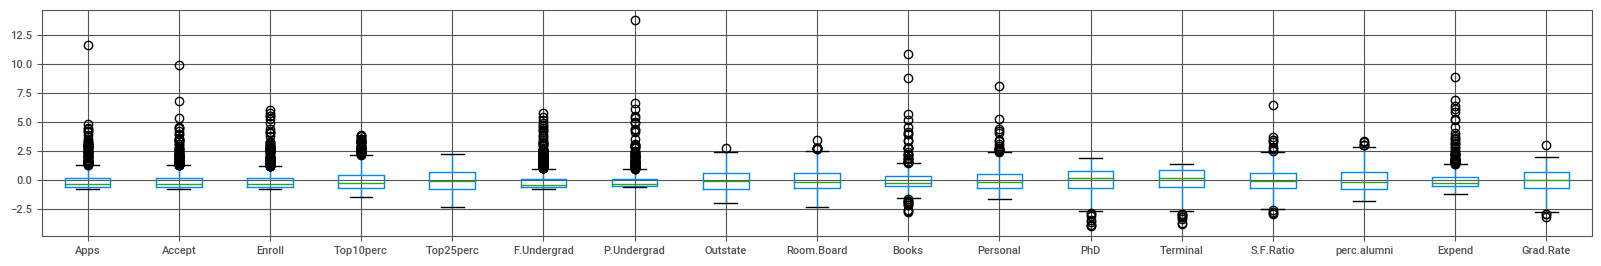

In [36]:
print("Box plot for data after scaling with outliers" )
data_scale.boxplot(figsize=(20,3))

In [37]:
data_scale.describe().T

count          mean       std       min       25%       50%  \
Apps         777.0  6.355797e-17  1.000644 -0.755134 -0.575441 -0.373254   
Accept       777.0  6.774575e-17  1.000644 -0.794764 -0.577581 -0.371011   
Enroll       777.0 -5.249269e-17  1.000644 -0.802273 -0.579351 -0.372584   
Top10perc    777.0 -2.753232e-17  1.000644 -1.506526 -0.712380 -0.258583   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -1.661405e-16  1.000644 -0.734617 -0.558643 -0.411138   
P.Undergrad  777.0 -3.029180e-17  1.000644 -0.561502 -0.499719 -0.330144   
Outstate     777.0  6.515595e-17  1.000644 -2.014878 -0.776203 -0.112095   
Room.Board   777.0  3.570717e-16  1.000644 -2.351778 -0.693917 -0.143730   
Books        777.0 -2.192583e-16  1.000644 -2.747779 -0.481099 -0.299280   
Personal     777.0  4.765243e-17  1.000644 -1.611860 -0.725120 -0.207855   
PhD          777.0  5.954768e-17  1.000644 -3.962596 -0.653295  0.143389   
Terminal     777.0 -4.481615e-16  1.000644 -3.785982 -0.591502  0.156142   
S.F.Ratio    777.0 -2.057556e-17  1.000644 -2.929799 -0.654660 -0.123794   
perc.alumni  777.0 -6.022638e-17  1.000644 -1.836580 -0.786824 -0.140820   
Expend       777.0  1.213101e-16  1.000644 -1.240641 -0.557483 -0.245893   
Grad.Rate    777.0  3.886495e-16  1.000644 -3.230876 -0.726019 -0.026990   

                  75%        max  
Apps         0.160912  11.658671  
Accept       0.165417   9.924816  
Enroll       0.131413   6.043678  
Top10perc    0.422113   3.882319  
Top25perc    0.667104   2.233391  
F.Undergrad  0.062941   5.764674  
P.Undergrad  0.073418  13.789921  
Outstate     0.617927   2.800531  
Room.Board   0.631824   3.436593  
Books        0.306784  10.852297  
Personal     0.531095   8.068387  
PhD          0.756222   1.859323  
Terminal     0.835818   1.379560  
S.F.Ratio    0.609307   6.499390  
perc.alumni  0.666685   3.331452  
Expend       0.224174   8.924721  
Grad.Rate    0.730293   3.060392

#### Without removing the outliers, if we scale the data using z score it wil affect the mean and the standard deviation of the data. 
#### From the above analysis we can see that the standard deviation for scaled data with outliers is 1.00644.

In [38]:
print("removing the outlier   ")


def outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)


data_wo =data_new.apply(outlier)
data_wo.head()

removing the outlier   


Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660.0  1232.0   721.0       23.0         52       2885.0        537.0   
1  2186.0  1924.0   512.0       16.0         29       2683.0       1227.0   
2  1428.0  1097.0   336.0       22.0         50       1036.0         99.0   
3   417.0   349.0   137.0       60.0         89        510.0         63.0   
4   193.0   146.0    55.0       16.0         44        249.0        869.0   

   Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0    7440.0      3300.0  450.0    2200.0  70.0      78.0       18.1   
1   12280.0      6450.0  750.0    1500.0  29.0      52.8       12.2   
2   11250.0      3750.0  400.0    1165.0  53.0      66.0       12.9   
3   12960.0      5450.0  450.0     875.0  92.0      97.0        7.7   
4    7560.0      4120.0  765.6    1500.0  76.0      72.0       11.9   

   perc.alumni   Expend  Grad.Rate  
0         12.0   7041.0       60.0  
1         16.0  10527.0       56.0  
2         30.0   8735.0       54.0  
3         37.0  17974.8       59.0  
4          2.0  10922.0       37.0

In [39]:
data_wo.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   2856.956242  3120.470980    81.0   776.0  1558.0   
Accept       777.0   1917.760103  1942.822994    72.0   604.0  1110.0   
Enroll       777.0    748.335907   781.271463    35.0   242.0   434.0   
Top10perc    777.0     26.853024    15.607194     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3678.852767  4414.345270   139.0   992.0  1707.0   
P.Undergrad  777.0    744.579408   940.269547     1.0    95.0   353.0   
Outstate     777.0  10436.548263  4013.095875  2340.0  7320.0  9990.0   
Room.Board   777.0   4347.803089  1073.326060  1780.0  3597.0  4200.0   
Books        777.0    539.029086   110.372183   275.0   470.0   500.0   
Personal     777.0   1311.275418   579.698842   250.0   850.0  1200.0   
PhD          777.0     72.942600    15.556248    29.0    62.0    75.0   
Terminal     777.0     79.919434    14.150183    41.0    71.0    82.0   
S.F.Ratio    777.0     14.042471     3.667058     4.3    11.5    13.6   
perc.alumni  777.0     22.644788    12.140180     0.0    13.0    21.0   
Expend       777.0   9245.924582  3547.297573  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.524067    16.887333    18.0    53.0    65.0   

                 75%      max  
Apps          3624.0  11066.2  
Accept        2424.0   6979.2  
Enroll         902.0   2757.0  
Top10perc       35.0     65.2  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  14477.8  
P.Undergrad    967.0   3303.6  
Outstate     12925.0  20100.0  
Room.Board    5050.0   7131.0  
Books          600.0    795.0  
Personal      1700.0   2958.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     23.6  
perc.alumni     31.0     58.0  
Expend       10830.0  17974.8  
Grad.Rate       78.0    100.0

In [40]:
print(" scaling data after removing outliers")

data_scale_wo=data_wo.apply(zscore)
data_scale_wo.head()

 scaling data after removing outliers


Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.383829 -0.353198 -0.035012  -0.247034  -0.191827    -0.179951   
1 -0.215156  0.003214 -0.302696  -0.695834  -1.353911    -0.225740   
2 -0.458225 -0.422730 -0.528115  -0.311148  -0.292878    -0.599082   
3 -0.782423 -0.807984 -0.782992   2.125195   1.677612    -0.718316   
4 -0.854253 -0.912539 -0.888017  -0.695834  -0.596031    -0.777479   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.220908 -0.747173   -0.976849 -0.807146  1.534067 -0.189281 -0.135735   
1     0.513397  0.459655    1.959843  1.912681  0.325766 -2.826575 -1.917777   
2    -0.687032  0.202830   -0.557322 -1.260450 -0.252493 -1.282793 -0.984326   
3    -0.725344  0.629209    1.027560 -0.807146 -0.753075  1.225853  1.207869   
4     0.132410 -0.717252   -0.212377  2.054112  0.325766  0.196665 -0.560031   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.107193    -0.877388 -0.621979  -0.327324  
1  -0.502762    -0.547691  0.361374  -0.564340  
2  -0.311750     0.606247 -0.144125  -0.682848  
3  -1.730694     1.183216  2.462296  -0.386578  
4  -0.584624    -1.701629  0.472798  -1.690169

data before scaling without outliers


<AxesSubplot:>

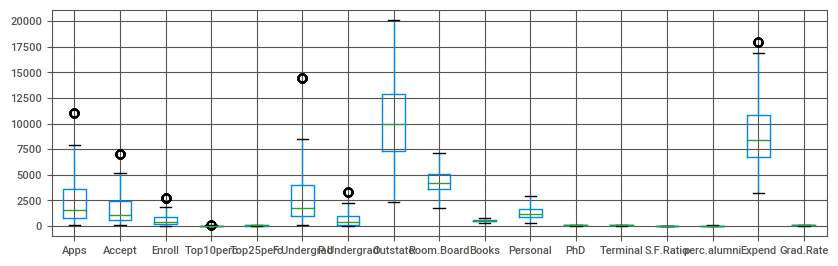

In [41]:
print ("data before scaling without outliers")
data_wo.boxplot(figsize=(10,3))


data after scaling without outliers


<AxesSubplot:>

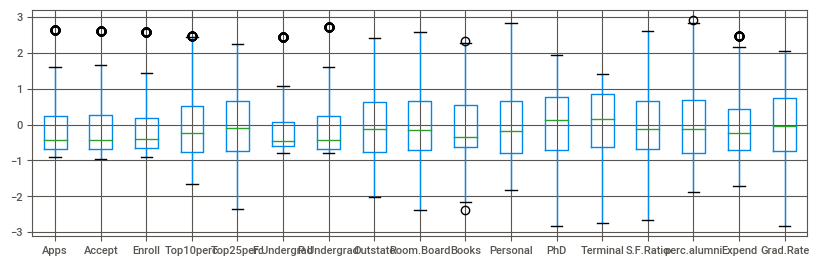

In [42]:
print ("data after scaling without outliers")
data_scale_wo.boxplot(figsize=(10,3))


#### By scaling, all variables have the same standard deviation, thus all the variables have the same weight and resulting in PCA calculating relevant axis.
#### Before scaling, we only had one variable with no outliers(25% top); Post scaaling, we have multiple variables with negligible outliers - this is achieved by normalizing the scale of the variables.

### 2.5. Extract the eigenvalues and eigenvectors.

In [43]:
cov_matrix = np.cov(data_scale_wo.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.34924522e-01  8.71047851e-01  3.24267498e-01
   3.62868715e-01  8.17850066e-01  5.01757457e-01  6.32865674e-02
   1.82959147e-01  2.33291015e-01  2.29533091e-01  4.46769909e-01
   4.17266656e-01  1.14213807e-01 -1.00610235e-01  2.54533823e-01
   1.47156965e-01]
 [ 9.34924522e-01  1.00128866e+00  9.22355696e-01  2.20622220e-01
   2.68343861e-01  8.71549611e-01  5.56937826e-01 -1.42554840e-02
   1.10325234e-01  2.13905650e-01  2.56349672e-01  4.07561902e-01
   3.84055661e-01  1.82533467e-01 -1.62609751e-01  1.66268254e-01
   6.95416281e-02]
 [ 8.71047851e-01  9.22355696e-01  1.00128866e+00  1.67564256e-01
   2.24859762e-01  9.48490114e-01  6.42498582e-01 -1.60758239e-01
  -3.72502918e-02  2.13398113e-01  3.47533881e-01  3.61278980e-01
   3.36082067e-01  2.67904002e-01 -2.13741732e-01  5.73414255e-02
  -4.05441513e-02]
 [ 3.24267498e-01  2.20622220e-01  1.67564256e-01  1.00128866e+00
   9.14894801e-01  1.03808804e-01 -1.46595772e-01  5.64307196e-

In [44]:
print(" eigen values and eigen vector ")
eig_vals, eig_vecs = LA.eigh(cov_matrix) # used eigh instead of eif for performance gain 
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

 eigen values and eigen vector 
Eigen Vectors 
%s [[-1.51051724e-01  5.73869368e-01  2.54721171e-02  3.50002377e-01
   4.76265776e-01 -2.73993248e-02 -6.79408155e-02 -1.34049566e-01
   1.84655032e-01 -3.41030317e-02  1.23782113e-02  4.76414519e-02
  -2.28743180e-01  1.02559773e-01  9.77100175e-02 -3.24930495e-01
  -2.42671239e-01]
 [ 4.52766958e-01 -6.43625404e-01 -4.08143058e-02  1.12837998e-01
   2.08677137e-01 -1.27528369e-01 -2.86891699e-02 -1.23207526e-01
   1.89697047e-01 -1.02521665e-01 -1.41529768e-03  3.31338141e-02
  -2.02792107e-01  1.21914245e-01  1.25144023e-01 -3.57755851e-01
  -2.08095876e-01]
 [-7.50067816e-01 -2.58381892e-01  3.37484396e-02 -2.25003975e-01
  -2.65981931e-01 -1.80558174e-02 -2.29745788e-02 -4.79563882e-02
   5.20184210e-02 -1.34762063e-01  7.92830517e-03 -3.89761143e-02
  -1.72168365e-01  1.42497171e-02  9.44419384e-02 -3.95824297e-01
  -1.64564266e-01]
 [ 5.89947774e-02 -5.31897461e-02  7.23553559e-01 -3.22924466e-02
   1.62488072e-02  4.57358763e-02 -

### 2.6. Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [45]:
pca = PCA(n_components=3)
data_reduced = pca.fit_transform(data_scale_wo)
data_reduced.transpose()

array([[-1.73690053, -1.59813534, -1.5427997 , ..., -0.67443639,
         6.6604872 , -0.62212047],
       [ 0.78652267, -0.33203883, -1.37926794, ..., -0.14322329,
        -1.08947808,  0.63056856],
       [ 0.0913572 ,  2.12932938, -0.60242058, ...,  0.37332843,
         1.41416131, -1.31545432]])

In [46]:
pca.components_

array([[ 0.24267123,  0.20809587,  0.16456427,  0.34463353,  0.3378584 ,
         0.13428769,  0.01451289,  0.29730457,  0.2511921 ,  0.09356817,
        -0.04846688,  0.32466754,  0.32050994, -0.17847668,  0.19861754,
         0.34015699,  0.24864478],
       [ 0.32493047,  0.35775585,  0.39582431, -0.07539009, -0.03672113,
         0.40624369,  0.35491663, -0.23736241, -0.12378904,  0.10601539,
         0.23546922,  0.07065173,  0.05966643,  0.24783489, -0.24326186,
        -0.13574787, -0.16060776],
       [-0.09774393, -0.1251541 , -0.09442148,  0.0723851 ,  0.0463486 ,
        -0.08720429, -0.03870995, -0.02057768,  0.02607806,  0.71355757,
         0.52183311, -0.05730359, -0.03741349, -0.25838406, -0.10991406,
         0.17290996, -0.23102783]])

In [47]:
principalDf = pd.DataFrame(data = data_reduced
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
principalDf.head()

principal component 1  principal component 2  principal component 3
0              -1.736901               0.786523               0.091357
1              -1.598135              -0.332039               2.129329
2              -1.542800              -1.379268              -0.602421
3               3.181988              -2.993983               0.335459
4              -1.785882              -0.202227               2.730809

In [48]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_scale_wo))

df_comp

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.242671  0.208096  0.164564   0.344634   0.337858     0.134288   
1  0.324930  0.357756  0.395824  -0.075390  -0.036721     0.406244   
2 -0.097744 -0.125154 -0.094421   0.072385   0.046349    -0.087204   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.014513  0.297305    0.251192  0.093568 -0.048467  0.324668  0.320510   
1     0.354917 -0.237362   -0.123789  0.106015  0.235469  0.070652  0.059666   
2    -0.038710 -0.020578    0.026078  0.713558  0.521833 -0.057304 -0.037413   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.178477     0.198618  0.340157   0.248645  
1   0.247835    -0.243262 -0.135748  -0.160608  
2  -0.258384    -0.109914  0.172910  -0.231028

<AxesSubplot:>

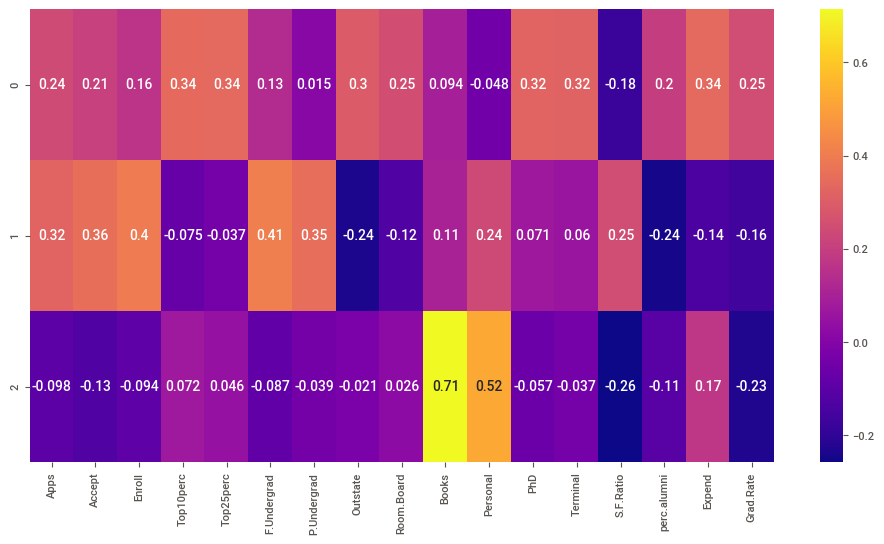

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',annot= True)

In [50]:
compabs= df_comp.abs()
print("The communality is ")
compabs.sum(axis = 0, skipna = True)

The communality is 


Apps           0.665346
Accept         0.691006
Enroll         0.654810
Top10perc      0.492409
Top25perc      0.420928
F.Undergrad    0.627736
P.Undergrad    0.408139
Outstate       0.555245
Room.Board     0.401059
Books          0.913141
Personal       0.805769
PhD            0.452623
Terminal       0.417590
S.F.Ratio      0.684696
perc.alumni    0.551793
Expend         0.648815
Grad.Rate      0.640280
dtype: float64

### 2.7. Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only).

In [51]:
print("The the explicit form of the first PC :") 
idx = np.argsort(eig_vals)[::-1]
evecs = eig_vecs[:,idx]
evals = eig_vals[idx]
evecs = evecs[:, :1]
pc1=np.dot(evecs.T, data_scale_wo.T).round(2)

pc1

The the explicit form of the first PC :


array([[ 1.74,  1.6 ,  1.54, -3.18,  1.79,  0.55, -0.23, -1.9 , -0.8 ,
         2.84, -1.93, -2.2 ,  0.09, -0.88,  2.2 ,  1.51, -5.23,  2.22,
         2.03,  2.98, -0.17, -0.42,  1.8 , -1.14, -0.69,  3.46, -1.27,
        -1.35,  1.65, -1.03,  0.94, -1.16,  2.66,  1.97,  0.03,  1.15,
        -3.82, -3.74,  0.47, -1.36, -0.45,  0.06,  1.71,  1.34, -0.94,
         3.65,  2.2 ,  0.4 , -1.27,  0.34,  2.04,  1.47,  3.22,  3.46,
        -1.15,  1.17,  1.05,  3.14,  1.28, -4.92, -5.31, -0.72,  0.56,
        -0.82, -4.21,  1.61,  3.93,  2.29,  0.52, -1.33, -6.6 , -4.94,
        -4.27,  0.57, -1.28,  1.49,  0.64,  0.43, -1.15,  0.1 , -0.09,
         1.53,  2.6 , -0.06, -0.21,  3.38, -4.19, -5.29,  0.62,  1.72,
         0.73, -4.17,  1.31,  1.3 , -1.66,  1.63, -0.42,  1.74,  1.73,
        -0.07,  1.86, -0.28,  2.33,  2.27,  1.41,  3.29, -2.7 , -0.08,
        -1.54,  0.08, -0.2 ,  1.01,  2.32,  2.78, -4.78, -2.15,  1.41,
        -2.35, -2.18,  3.19, -0.29,  0.83, -3.92, -4.31,  0.21,  1.05,
      

### 2.8. Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [52]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance ", cum_var_exp)

Cumulative Variance  [ 33.15185743  61.52550945  67.98957029  73.84487717  79.11892366
  83.61602283  87.06508197  90.32266981  92.9263317   95.17182864
  96.61489423  97.47757639  98.27677262  99.00385952  99.44252192
  99.77139178 100.        ]


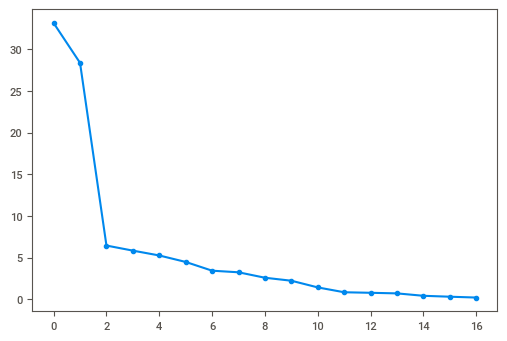

In [53]:
plt.plot(var_exp,marker='o')

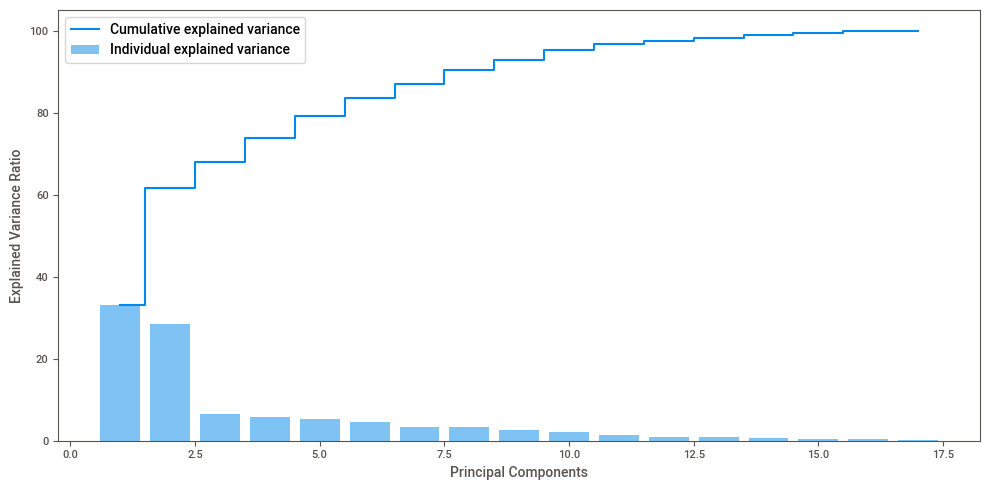

In [54]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### Cumulative values is the created by  adding all the  eigen values and finding the proportion of each  
#### By knowing the cumulative values we can know how many percent of information is captured in each princple components and decide the number of optimum number.
#### Eigen vector indicate the coefficeint of the features or numerical columns. 
#### From the above cumative graph we can find that first  two PCA   components is picking up around 60 percenatge.

### 2.9. Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis?

##### The three Principle compoennts (PC0 ,PC1 and PC2 ) created are free from multicollenerity 
##### Just three PCA (out of 17 ) components is picking up around  68 % of variability .
##### PC0 explains most of variables at average level of .22 with good  explanity for top 10 perc , top 20 perct,expend,phd,  terminal, outstate variables.
##### pc1 has good  explanity for f.undergrad ,enroll ,accept,punderground , accept and apps 
##### PC2 has highest explanity for  Books and personal .
##### The highest communality variable is Personal with 81% communility 
##### The lowest communality variable is  with 40 % communility 
